This notebook is used to generate examples for a blog post on cross entropy loss at 
https://frankiecoughlan.data.blog/2021/12/10/cross-entropy-loss/

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *

Sigmoid Function

/opt/conda/envs/fastai/lib/python3.8/site-packages/fastbook/__init__.py:74: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729096996/work/aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


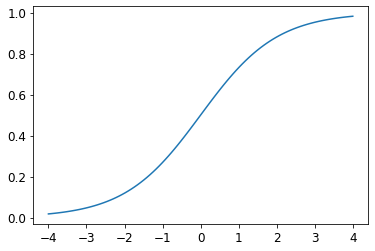

In [3]:
plot_function(torch.sigmoid, min=-4,max=4)

Randomly generated tensor

In [4]:
#hide
torch.random.manual_seed(42);

In [5]:
acts = torch.randn((6,1))*2
acts

tensor([[ 0.6734],
        [ 0.2576],
        [ 0.4689],
        [ 0.4607],
        [-2.2457],
        [-0.3727]])

Applying the sigmoid to it

In [6]:
acts.sigmoid()

tensor([[0.6623],
        [0.5641],
        [0.6151],
        [0.6132],
        [0.0957],
        [0.4079]])

Randomly generated 6 x 2 tensor

In [7]:
acts = torch.randn((6,2))*2
acts

tensor([[ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187],
        [ 2.2206, -3.3796],
        [-1.9779,  1.9159],
        [ 2.6443,  1.6344]])

In [ ]:
Applying the sigmoid to it

In [ ]:
acts.sigmoid()

Getting the difference and applying the sigmoid to that

In [9]:
(acts[:,0]-acts[:,1]).sigmoid()

tensor([0.9966, 0.5959, 0.3661, 0.9963, 0.0200, 0.7330])

Softmax definition
``` python
def softmax(x): return exp(x) / exp(x).sum(dim=1, keepdim=True)
```

In [10]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

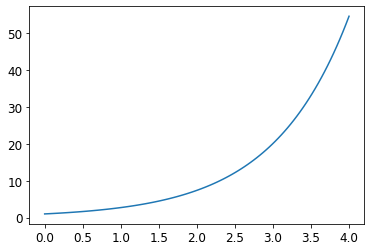

In [10]:
plot_function(torch.exp, min=0,max=4)

### Log Likelihood

In [11]:
targ = tensor([0,1,0,1,1,0])

In [12]:
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [13]:
idx = range(6)
sm_acts[idx, targ]

tensor([0.6025, 0.4979, 0.1332, 0.0034, 0.4041, 0.3661])

In [18]:
-sm_acts[idx, targ]

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

In [17]:
F.nll_loss(sm_acts, targ, reduction='none')

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

### Taking the Log

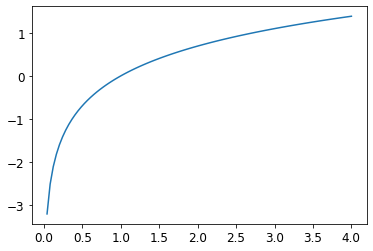

In [19]:
plot_function(torch.log, min=0,max=4)

In [ ]:
loss_func = nn.CrossEntropyLoss()

In [ ]:
loss_func(acts, targ)

tensor(1.8045)

In [ ]:
F.cross_entropy(acts, targ)

tensor(1.8045)

In [ ]:
nn.CrossEntropyLoss(reduction='none')(acts, targ)

tensor([0.5067, 0.6973, 2.0160, 5.6958, 0.9062, 1.0048])